# **Incremental Capstone 2** #

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import sys

# How to tell python version
#print (sys.version_info)
#print (platform.python_version())

# How to pip install from Terminal window:
# python -m pip install seaborn


### <u>**Data Import and Basic Info**</u>

In [2]:
# Import data into DataFrame
# Renamed CSV file is assumed to live in same folder as my notebook
df_NSME1988 = pd.read_csv("NSMES1988new.csv")

# Make a copy of the dataframe to contain the modifications completed in this workbook
df_NSME1988_new = df_NSME1988.copy(deep=True)

# Let's look at what we just imported and get some more info
# I like to delineate output to make it more readable
print("***********************************")
print("Basic Info of imported data set")
print("***********************************")
print()

# Print df Column Info
df_NSME1988.info()
print()
print()

# Print Stats
print("Description - Stats")
print()
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_NSME1988.describe(include='all').T)



***********************************
Basic Info of imported data set
***********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      4406 non-null   int64 
 1   id                              4406 non-null   int64 
 2   physician_office_visits         4406 non-null   int64 
 3   nonphysician_office_visits      4406 non-null   int64 
 4   physician_outpatient_visits     4406 non-null   int64 
 5   nonphysician_outpatient_visits  4406 non-null   int64 
 6   emergency_room_visits           4406 non-null   int64 
 7   number_of_hospital_stays        4406 non-null   int64 
 8   overall_health_factor           4406 non-null   object
 9   number_of_chronic_conditions    4406 non-null   int64 
 10  daily_living_activities         4406 non-null   object
 11  reg

### <u>**Clean up DataTypes to be most efficient memory/performance usage**</u>

**#1)** In the previous Capstone (#1) - I identified that I wanted to change the yes/no columns to be of type bool  
        This **imported modified new csv** data set already contains those conversions  
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**is_married, is_employed, has_health_insurance, has_medicaid**  
        This **imported modified new csv** data set already contains these conversions  
  
**#2)** In the previous Capstone (#1) - I identified that it didn't particularly make sense to have **family_income** as a float64 type.  
        It makes sense to change it to an **int32** with a max value of: 2,147,483,647  
        This **imported modified new csv** data set already contains this conversion  

**#3)** The following **int64** types can be converted to **int16**. (After some thought I thought we might encounter some larger numbers - max 32,767).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**physician_office_visits, nonphysician_office_visits, physician_outpatient_visits,**  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, number_of_chronic_conditions**

**#4)** The following **int64** types can be converted to **int8**. (After some thought I thought we might encounter some larger numbers).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**years_of_education, age**

#### <u>**Drop Columns that aren't useful** </u> ####
The id and unnamed columns will hold new value as we analyze/plot column values so drop them

In [3]:
df_NSME1988_new.drop('id', axis=1, inplace=True)
df_NSME1988_new.drop('Unnamed: 0', axis=1, inplace=True)

#### <u>**Data Type Conversions** </u> ####

In [4]:
# Int64 to Int16 conversions
columns = ['physician_office_visits', 'nonphysician_office_visits', 'physician_outpatient_visits',
            'nonphysician_outpatient_visits', 'emergency_room_visits', 'number_of_hospital_stays', 
            'number_of_chronic_conditions']
df_NSME1988_new[columns] = df_NSME1988_new[columns].astype('int16')

# Int64 to Int8 conversions
columns = ['years_of_education', 'age']
df_NSME1988_new[columns] = df_NSME1988_new[columns].astype('int8')

print()
print("Dataframe with modified data types:")
df_NSME1988_new.info()
print()
print()


Dataframe with modified data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   physician_office_visits         4406 non-null   int16 
 1   nonphysician_office_visits      4406 non-null   int16 
 2   physician_outpatient_visits     4406 non-null   int16 
 3   nonphysician_outpatient_visits  4406 non-null   int16 
 4   emergency_room_visits           4406 non-null   int16 
 5   number_of_hospital_stays        4406 non-null   int16 
 6   overall_health_factor           4406 non-null   object
 7   number_of_chronic_conditions    4406 non-null   int16 
 8   daily_living_activities         4406 non-null   object
 9   region                          4406 non-null   object
 10  age                             4406 non-null   int8  
 11  gender                          4406 non-null   object
 12  is_married 

### <u>**Transform Data To More Meaningful Values**</u>

 At first glance its seems kinda of weird and less than intuitive the **age** and **income**
 are not true values, but rather a factor of some multiplier

**This is the code I used to transform those columns to "normalized-ish" integer values in the previous Capstone (#1)**  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;df_cleaned_up_data["age"] = (df_cleaned_up_data["age"] * 10).round().astype(np.int8)  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;df_cleaned_up_data["family_income"] = (df_cleaned_up_data["family_income"] * 10000).round().astype(np.int32)  
  
This **imported modified new csv** data set already contains these conversions

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and get the following stats:  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;min, max, mean, median, average and variance

In [5]:
# Iterate over numeric columns
print("Min, Max, Mean, Median and Variance of numeric columns in dataset")
print()
for col_name, col_data in df_NSME1988_new.select_dtypes(include=['number']).items():
    print(f"{col_name:40s} min:{col_data.min():>10}, max:{col_data.max():>10}, mean:{col_data.mean():>10.4f}, median:{col_data.median():>10.4f},  variance:{col_data.var():>10.4f}")
    
print()
print()

Min, Max, Mean, Median and Variance of numeric columns in dataset

physician_office_visits                  min:         0, max:        89, mean:    5.7744, median:    4.0000,  variance:   45.6871
nonphysician_office_visits               min:         0, max:       104, mean:    1.6180, median:    0.0000,  variance:   28.2711
physician_outpatient_visits              min:      -115, max:        71, mean:    0.6927, median:    0.0000,  variance:   11.9155
nonphysician_outpatient_visits           min:      -101, max:       113, mean:    0.4780, median:    0.0000,  variance:   11.9713
emergency_room_visits                    min:         0, max:        12, mean:    0.2635, median:    0.0000,  variance:    0.4951
number_of_hospital_stays                 min:         0, max:         8, mean:    0.2960, median:    0.0000,  variance:    0.5571
number_of_chronic_conditions             min:         0, max:         8, mean:    1.5420, median:    1.0000,  variance:    1.8215
age                    

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and plot histograms for the column data.  
I want to see what the distributions for each of the features looks like (skew left, skew right, normal..)
  
In working with no-code KNIME and RapidMiner (AI Studio), I liked the ability to see analysis of imported data  
A nice feature is the histograms they provided.

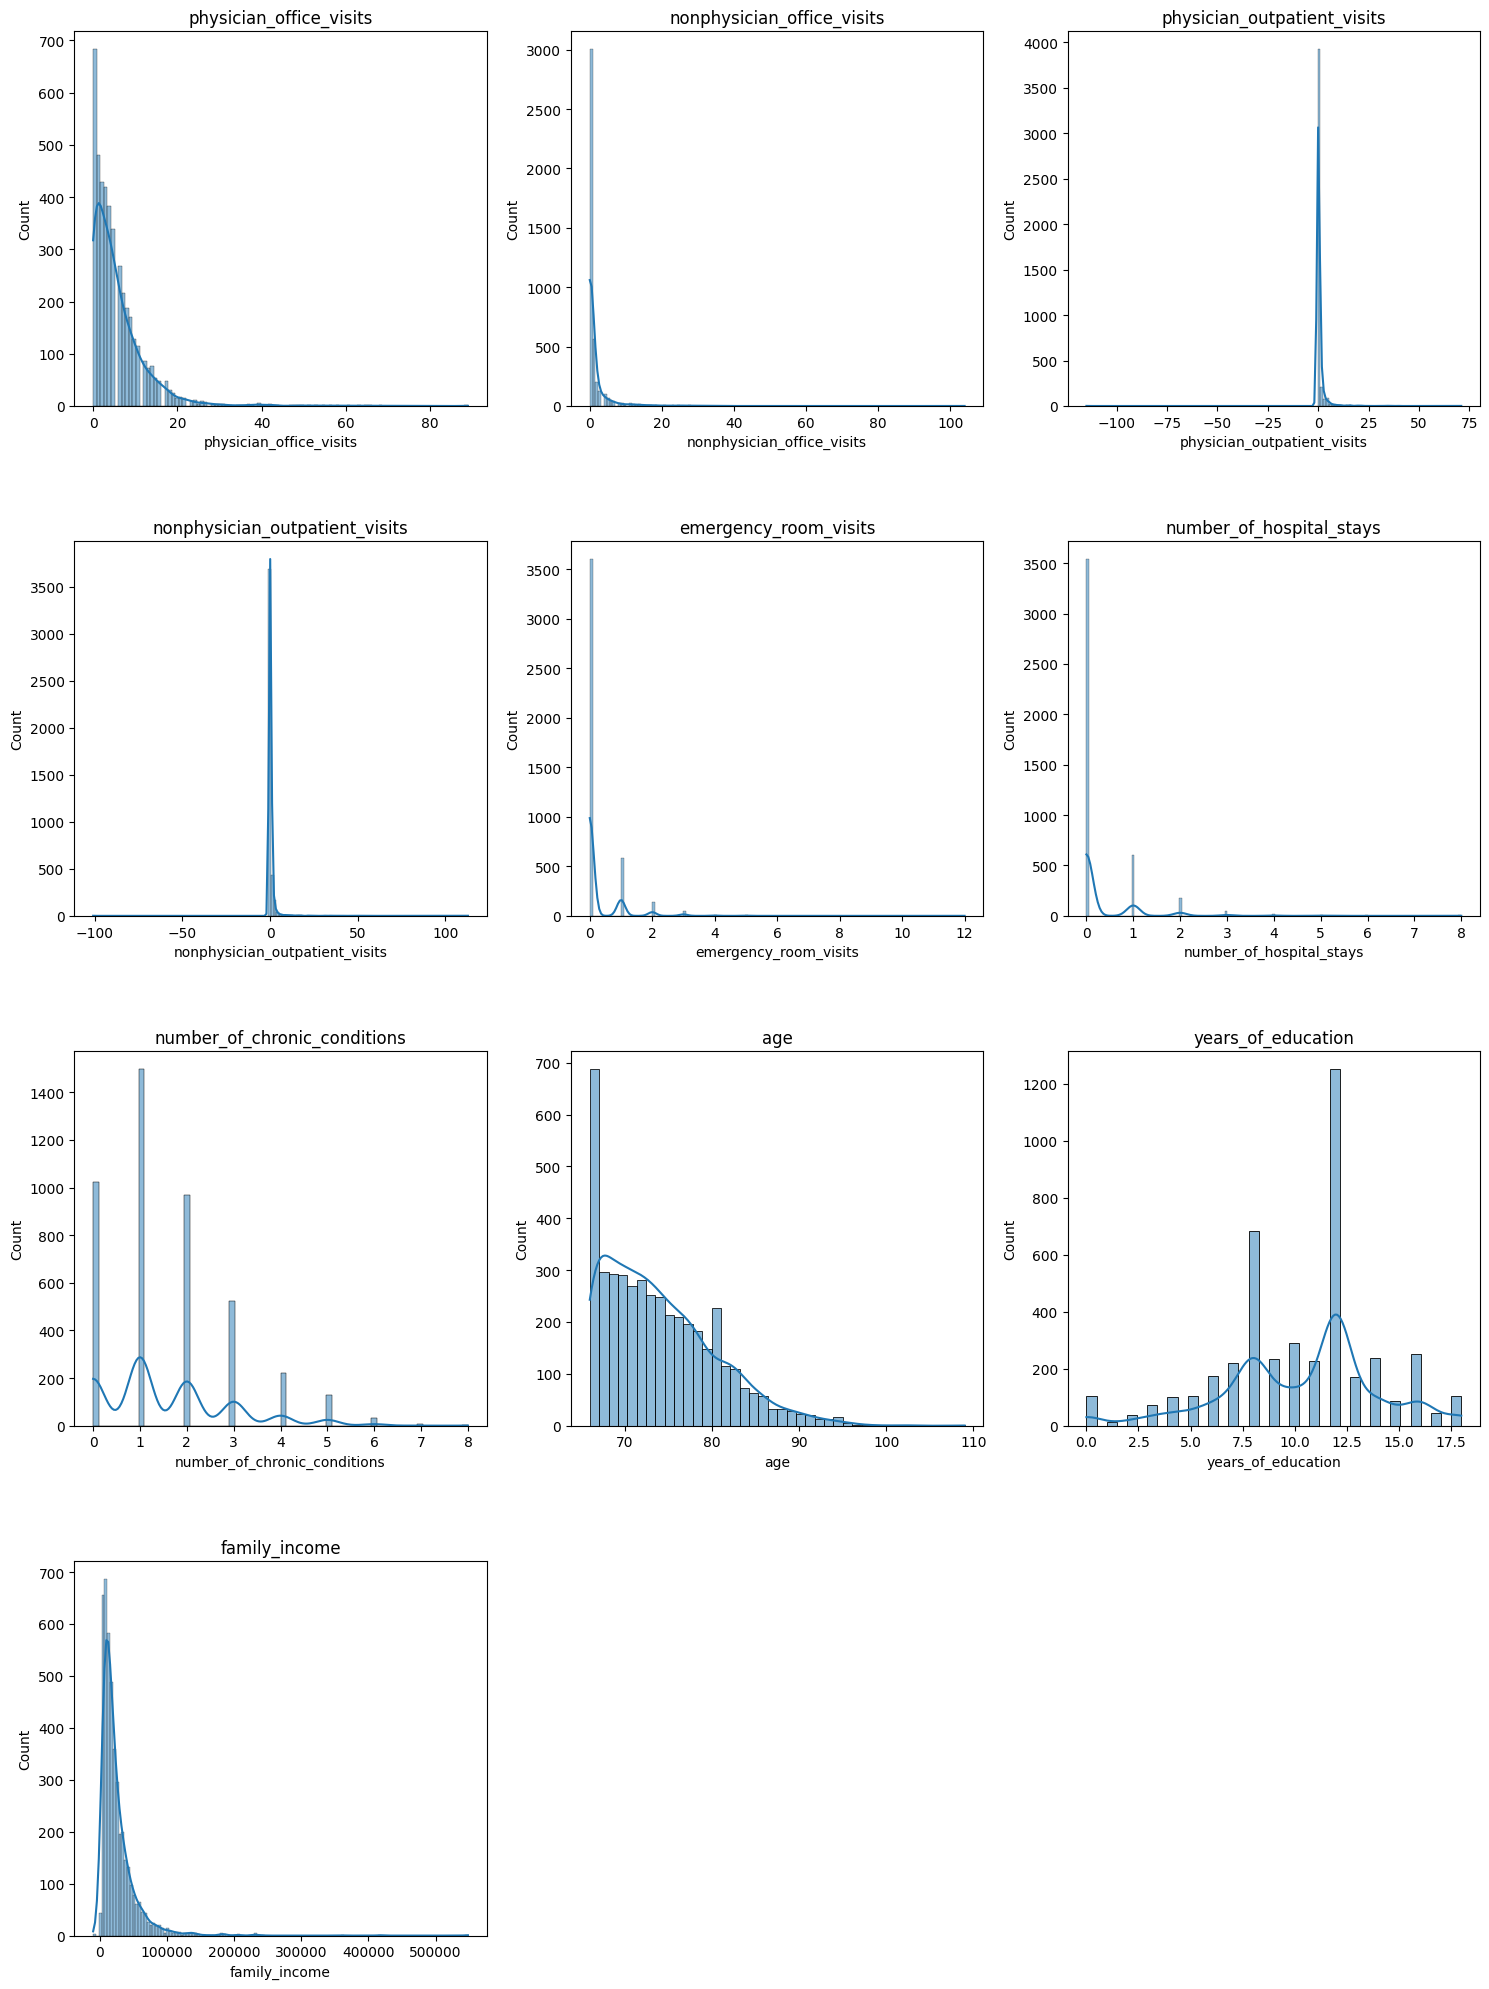

In [6]:
# Figure out the numeric columns
numeric_cols = df_NSME1988_new.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)

# I need a 3X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_NSME1988_new, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide the blank/empty graphs
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    



### <u>**Some basic data analysis on non numerical columns**</u>
  
For starters, lets iterate over all the non numeric columns and plot histograms for the column data.  
I want to see what the distributions for each of the features looks like (skew left, skew right, normal..)


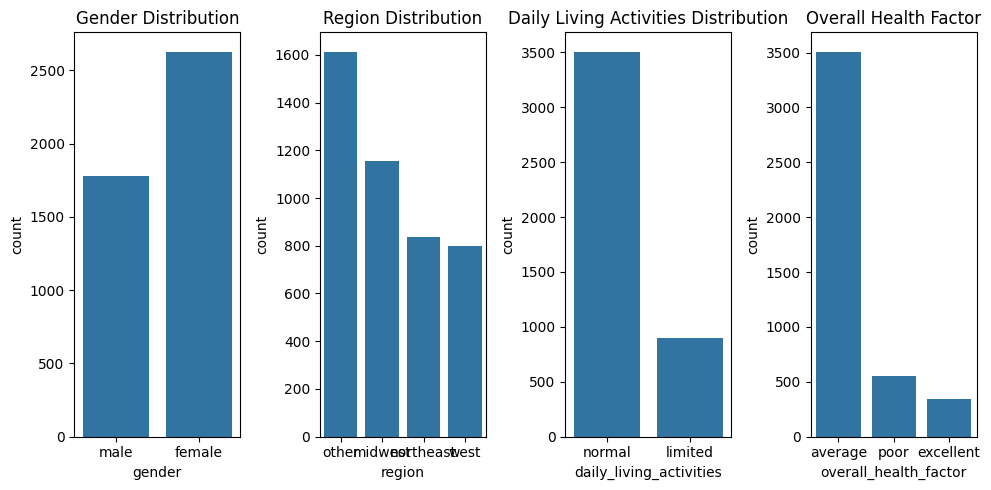

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Gender counts
sns.countplot(data=df_NSME1988_new, x='gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Region counts
sns.countplot(data=df_NSME1988_new, x='region', ax=axes[1])
axes[1].set_title('Region Distribution')

# Daily living activities counts
sns.countplot(data=df_NSME1988_new, x='daily_living_activities', ax=axes[2])
axes[2].set_title('Daily Living Activities Distribution')

# Overall Health Factor
sns.countplot(data=df_NSME1988_new, x='overall_health_factor', ax=axes[3])
axes[3].set_title('Overall Health Factor')

plt.tight_layout()
plt.show()

### <u>**Analysing the Non-Numeric distributions**</u> ###

We can infer some information based on the above plots.  
1) More women  
2) Other region seems to be most popular in the data  - right skewed, biased by "other"
3) Most people have normal daily activities  
4) Most people same to have average health. Overall Health is right skewed

### <u>**Looking at some interesting comparisons**</u> ###

It would be interesting to plot overall_health_factor, daily_living_activities, region, gender the numeric values  
It would also be worth taking a look at relationships between health factor and region, gender and activities
 

### <u>**Some Analysis of the Distributions**</u>

physician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew           
nonphysician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew       
physician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Left Skew -- perhaps Normal  
nonphysician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Normal    
emergency_room_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_hospital_stays:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_chronic_conditions:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew         
age:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew       
years_of_education&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Left Skew - Perhaps Normal  
family_income&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew

### <u>**Export Results back to CSV and JSON files**</u>


In [8]:
# Print df Column Info
df_NSME1988_new.info()
print()
print()

# Print Stats
print("Description - Stats")
print()
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_NSME1988_new.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   physician_office_visits         4406 non-null   int16 
 1   nonphysician_office_visits      4406 non-null   int16 
 2   physician_outpatient_visits     4406 non-null   int16 
 3   nonphysician_outpatient_visits  4406 non-null   int16 
 4   emergency_room_visits           4406 non-null   int16 
 5   number_of_hospital_stays        4406 non-null   int16 
 6   overall_health_factor           4406 non-null   object
 7   number_of_chronic_conditions    4406 non-null   int16 
 8   daily_living_activities         4406 non-null   object
 9   region                          4406 non-null   object
 10  age                             4406 non-null   int8  
 11  gender                          4406 non-null   object
 12  is_married                      4406 non-null   

#### **Export Results back to CSV and JSON files** ####

In [9]:
# Export the Cleaned up/ Translated Data to a Json and CSV files
print("Exported the Cleaned up/ Translated Data to a Json file")
df_NSME1988_new.to_json('NSMES1988New-Capstone-2.json', orient='records', indent=4)
print()

print("Exported the Cleaned up/ Translated Data to a CSV file")
df_NSME1988_new.to_csv('NSMES1988New-Capstone-2.csv')
print()

Exported the Cleaned up/ Translated Data to a Json file

Exported the Cleaned up/ Translated Data to a CSV file


PermissionError: [Errno 13] Permission denied: 'NSMES1988New-Capstone-2.csv'

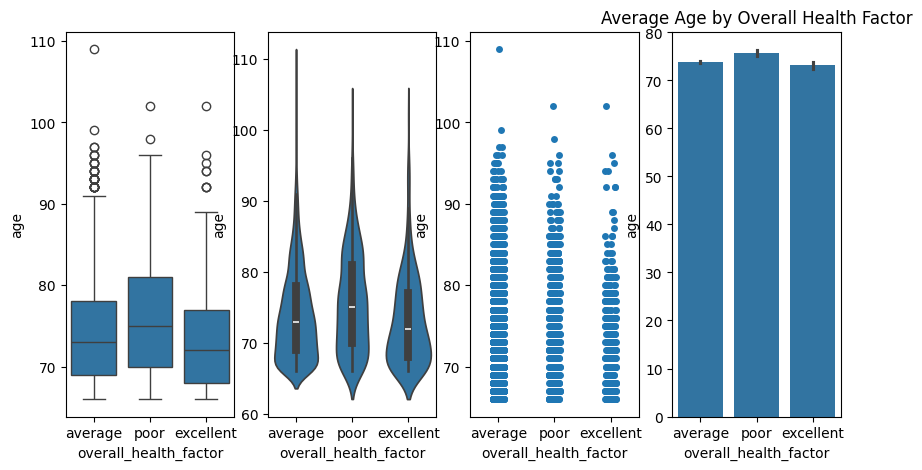

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

sns.boxplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[0])
plt.title('Age Distribution by Overall Health Factor')

sns.violinplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[1])
plt.title('Age Distribution by Overall Health Factor')

sns.stripplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[2])
plt.title('Age by Overall Health Factor')

sns.barplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[3])
plt.title('Average Age by Overall Health Factor')

plt.show()

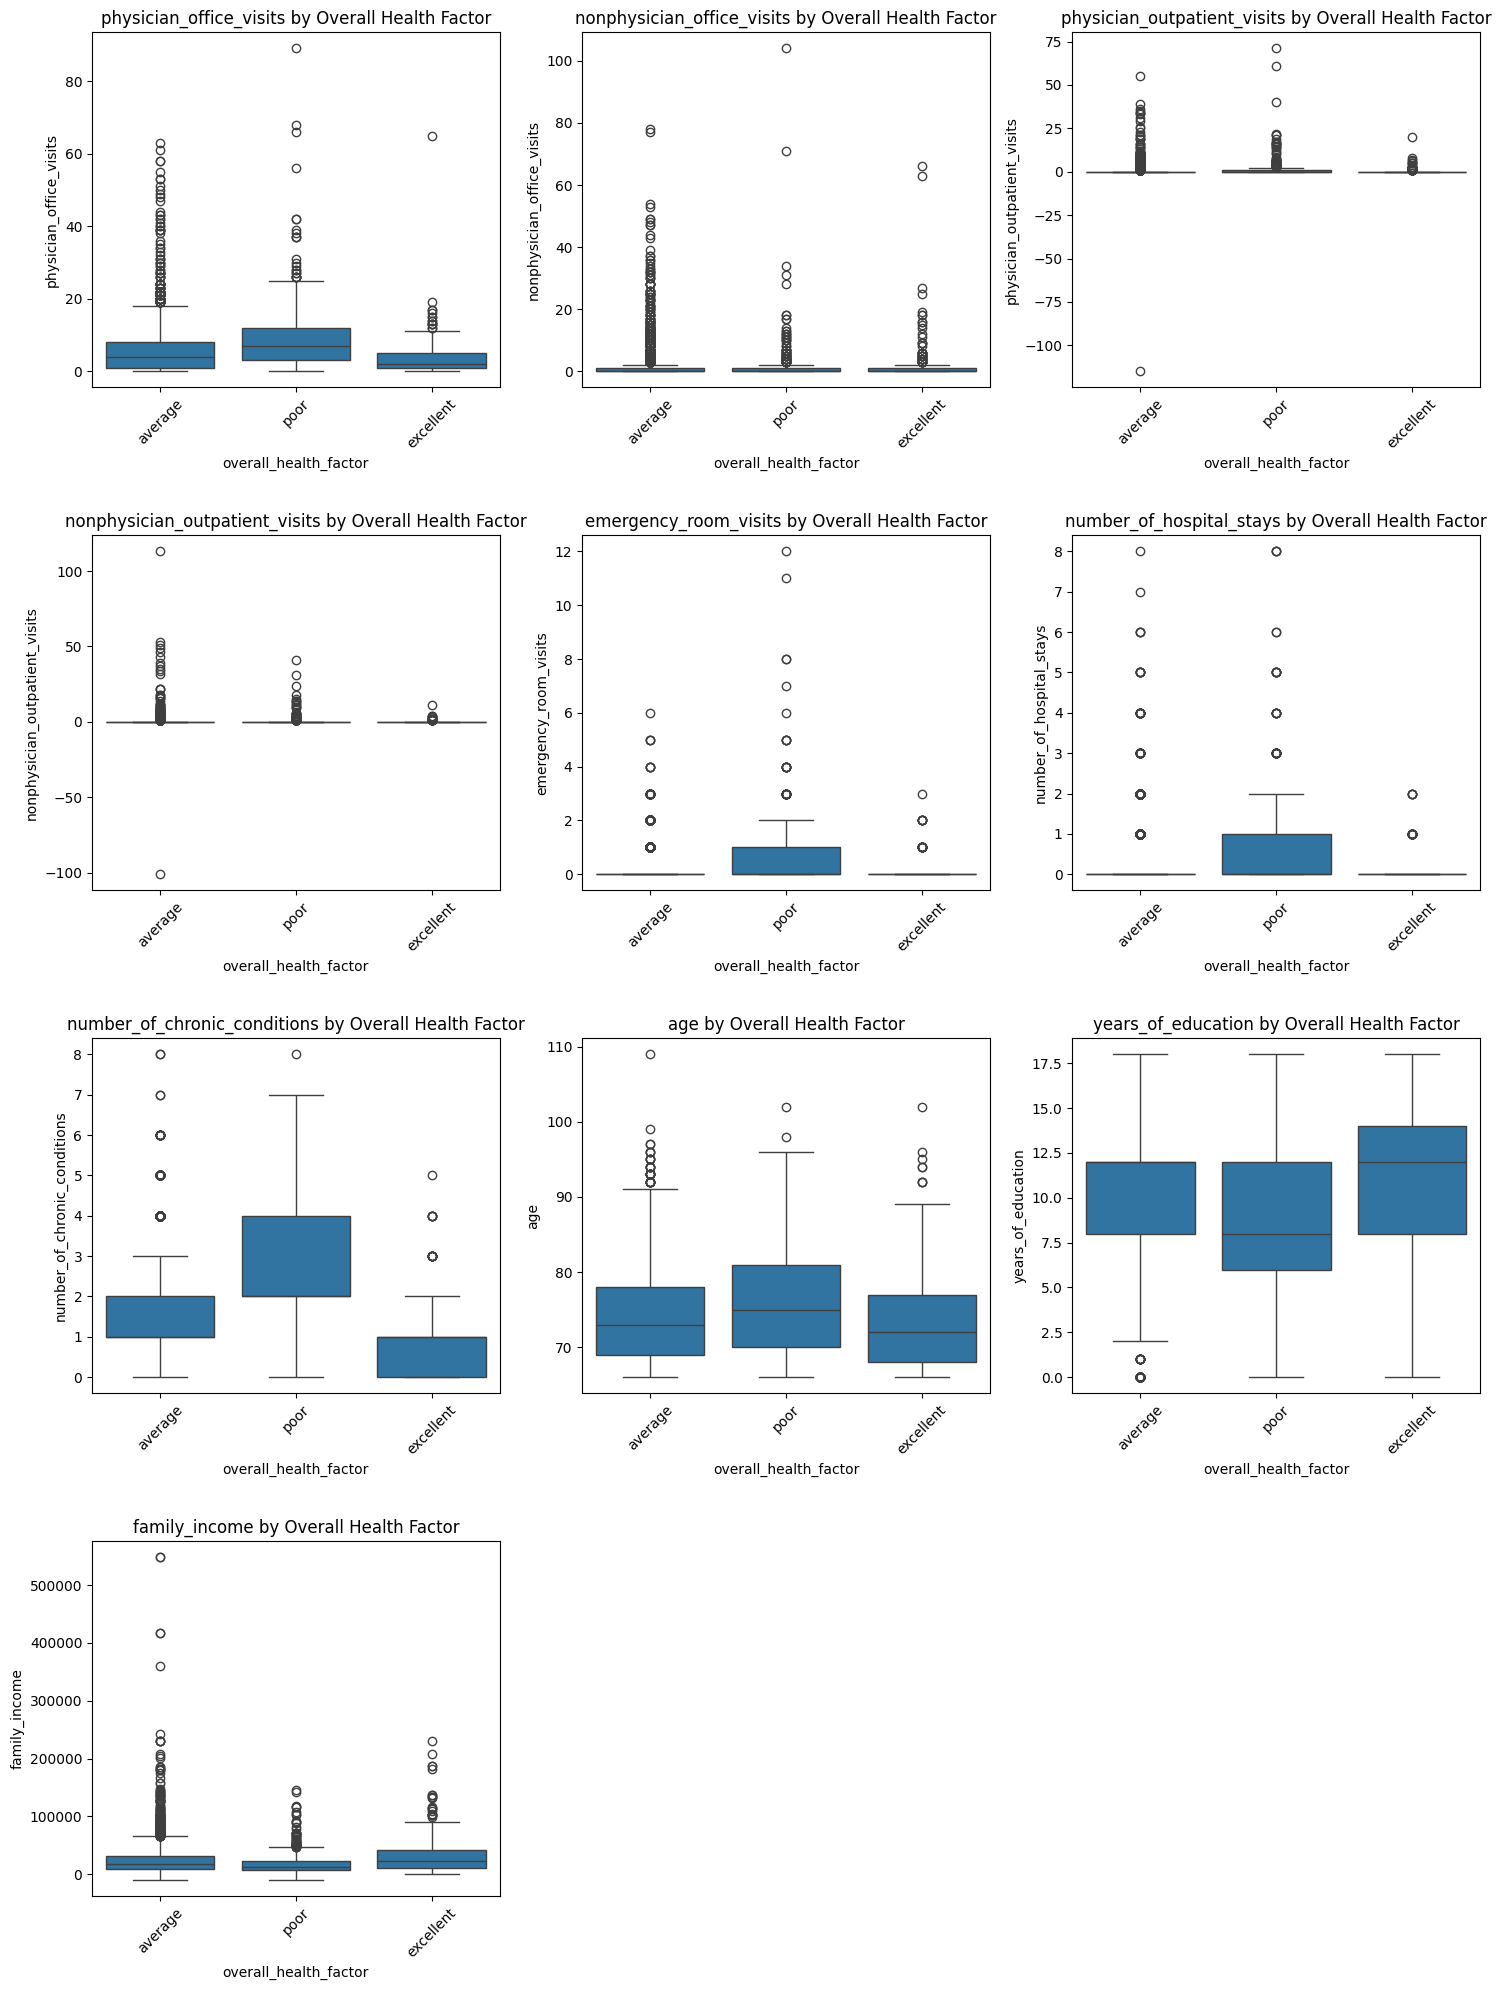

In [ ]:
# Get all numeric columns except the ones you want to exclude
numeric_cols = df_NSME1988_new.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Unnamed: 0', 'id']]

# Create subplots
n_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot box plots for each numeric feature vs overall_health_factor
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_NSME1988_new, x='overall_health_factor', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Overall Health Factor')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

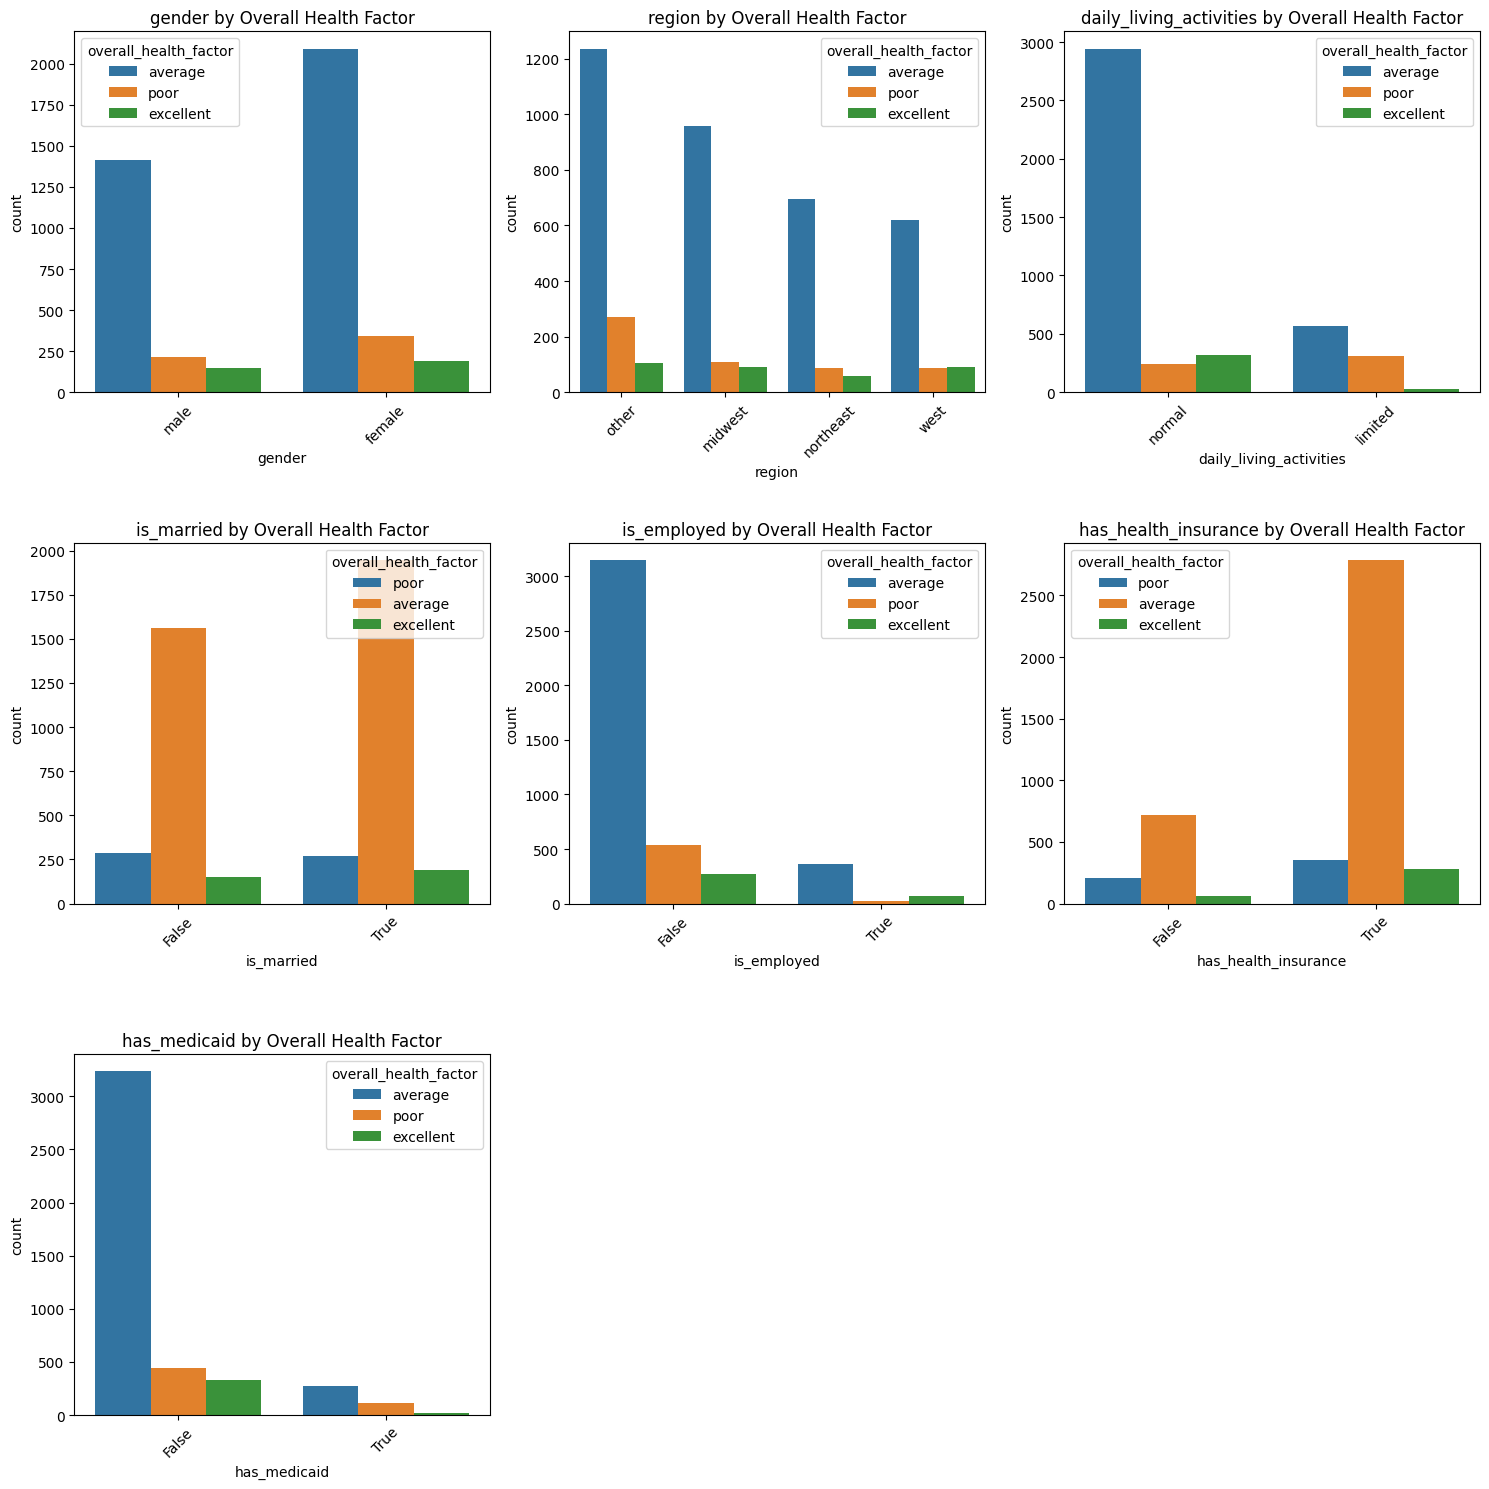

In [ ]:
# For categorical features, use count plots
categorical_cols = ['gender', 'region', 'daily_living_activities', 'is_married', 'is_employed', 'has_health_insurance', 'has_medicaid']

fig, axes = plt.subplots(nrows=(len(categorical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(categorical_cols) + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_NSME1988_new, x=col, hue='overall_health_factor', ax=axes[i])
    axes[i].set_title(f'{col} by Overall Health Factor')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

### **Capstone Session 2 Findings**

Intially I needed to do some data cleaning to be able to do some plots.  
I was able to do some histograms to look at the distributions of the features.  
I now have a basic understanding of most of the features - the plotting is visually useful.  
Other than "Other" in regions, I don't see any data values (ranges) that seem oddball or that could skew analysis.  

I am looking forward to doing some further analysis to compare the features and feature combinations against overall health.




# **===========================================================================================================================================================** #
# **Incremental Capstone 3** #
# **===========================================================================================================================================================** #

##### I am building Capstone 3 as a cumulative add on to Capstones 1 and 2 #####

In [ ]:
print()
print(df_NSME1988_new.describe().T)
print(df_NSME1988_new.info())


                                 count          mean           std      min     25%      50%      75%       max
physician_office_visits         4406.0      5.774399      6.759225      0.0     1.0      4.0      8.0      89.0
nonphysician_office_visits      4406.0      1.618021      5.317056      0.0     0.0      0.0      1.0     104.0
physician_outpatient_visits     4406.0      0.692692      3.451888   -115.0     0.0      0.0      0.0      71.0
nonphysician_outpatient_visits  4406.0      0.477985      3.459950   -101.0     0.0      0.0      0.0     113.0
emergency_room_visits           4406.0      0.263504      0.703659      0.0     0.0      0.0      0.0      12.0
number_of_hospital_stays        4406.0      0.295960      0.746398      0.0     0.0      0.0      0.0       8.0
number_of_chronic_conditions    4406.0      1.541988      1.349632      0.0     1.0      1.0      2.0       8.0
age                             4406.0     74.024058      6.334050     66.0    69.0     73.0     78.0  

## Variable Identification ##

    physician_office_visits         int16	- Numerical Descrete 
    nonphysician_office_visits      int16	- Numerical Descrete  
    physician_outpatient_visits     int16	- Numerical Descrete  
    nonphysician_outpatient_visits  int16	- Numerical Descrete  
    emergency_room_visits           int16	- Numerical Descrete  
    number_of_hospital_stays        int16	- Numerical Descrete  
    overall_health_factor           object  - Categorical Ordinal
    number_of_chronic_conditions    int16	- Numerical Descrete  
    daily_living_activities         object  - Categorical Ordinal
    region                          object  - Categorical Nominal 
    age                             int8	- Numerical  Discrete
    gender                          object  - Categorical Nominal 
    is_married                      bool  	- Categorical Nominal 
    years_of_education              int8	- Numerical Descrete   
    family_income                   int64	- Numerical Continuous 
    is_employed                     bool  	- Categorical Nominal 
    has_health_insurance            bool  	- Categorical Nominal 
    has_medicaid                    bool  	- Categorical Nominal 

    The following are considered Numerical Discrete variables becase they are countable instances of something (number of times you visit office, number of years,..)
        physician_office_visits, nonphysician_office_visits, nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, years_of_education, age        

    The following are considered Numerical Continuous variables because it has theoretically infinite values and can be measured
        family_income

    The following are Categorical Nominal because they have no inherant order or ranking (one of a group, one or the other, true/false)
        region, gender, is_married, is_employed, has_health_insurance, has_medicaid

    The following are Categorical Ordinal because they can be ranked or ordered (levels of overall_health/daily_activities)
        overall_health_factor, daily_living_activites

    overall_health_factor is really the (dependent variable) (label/role/outcome) that we are trying to predict based on all the other factors.
    We're also trying to determine how relevent the other factors (individually or combined) to overall_health.


## Data Analysis ##
### Univariate Analysis ###

##### Analyzing Number of Visits #####

Number of Columns: 16
Min - Max of Visits
physician_office_visits Min Visits: 0 Max Visits: 89
nonphysician_office_visits Min Visits: 0 Max Visits: 104
physician_outpatient_visits Min Visits: -115 Max Visits: 71
nonphysician_outpatient_visits Min Visits: -101 Max Visits: 113
emergency_room_visits Min Visits: 0 Max Visits: 12
number_of_hospital_stays Min Visits: 0 Max Visits: 8




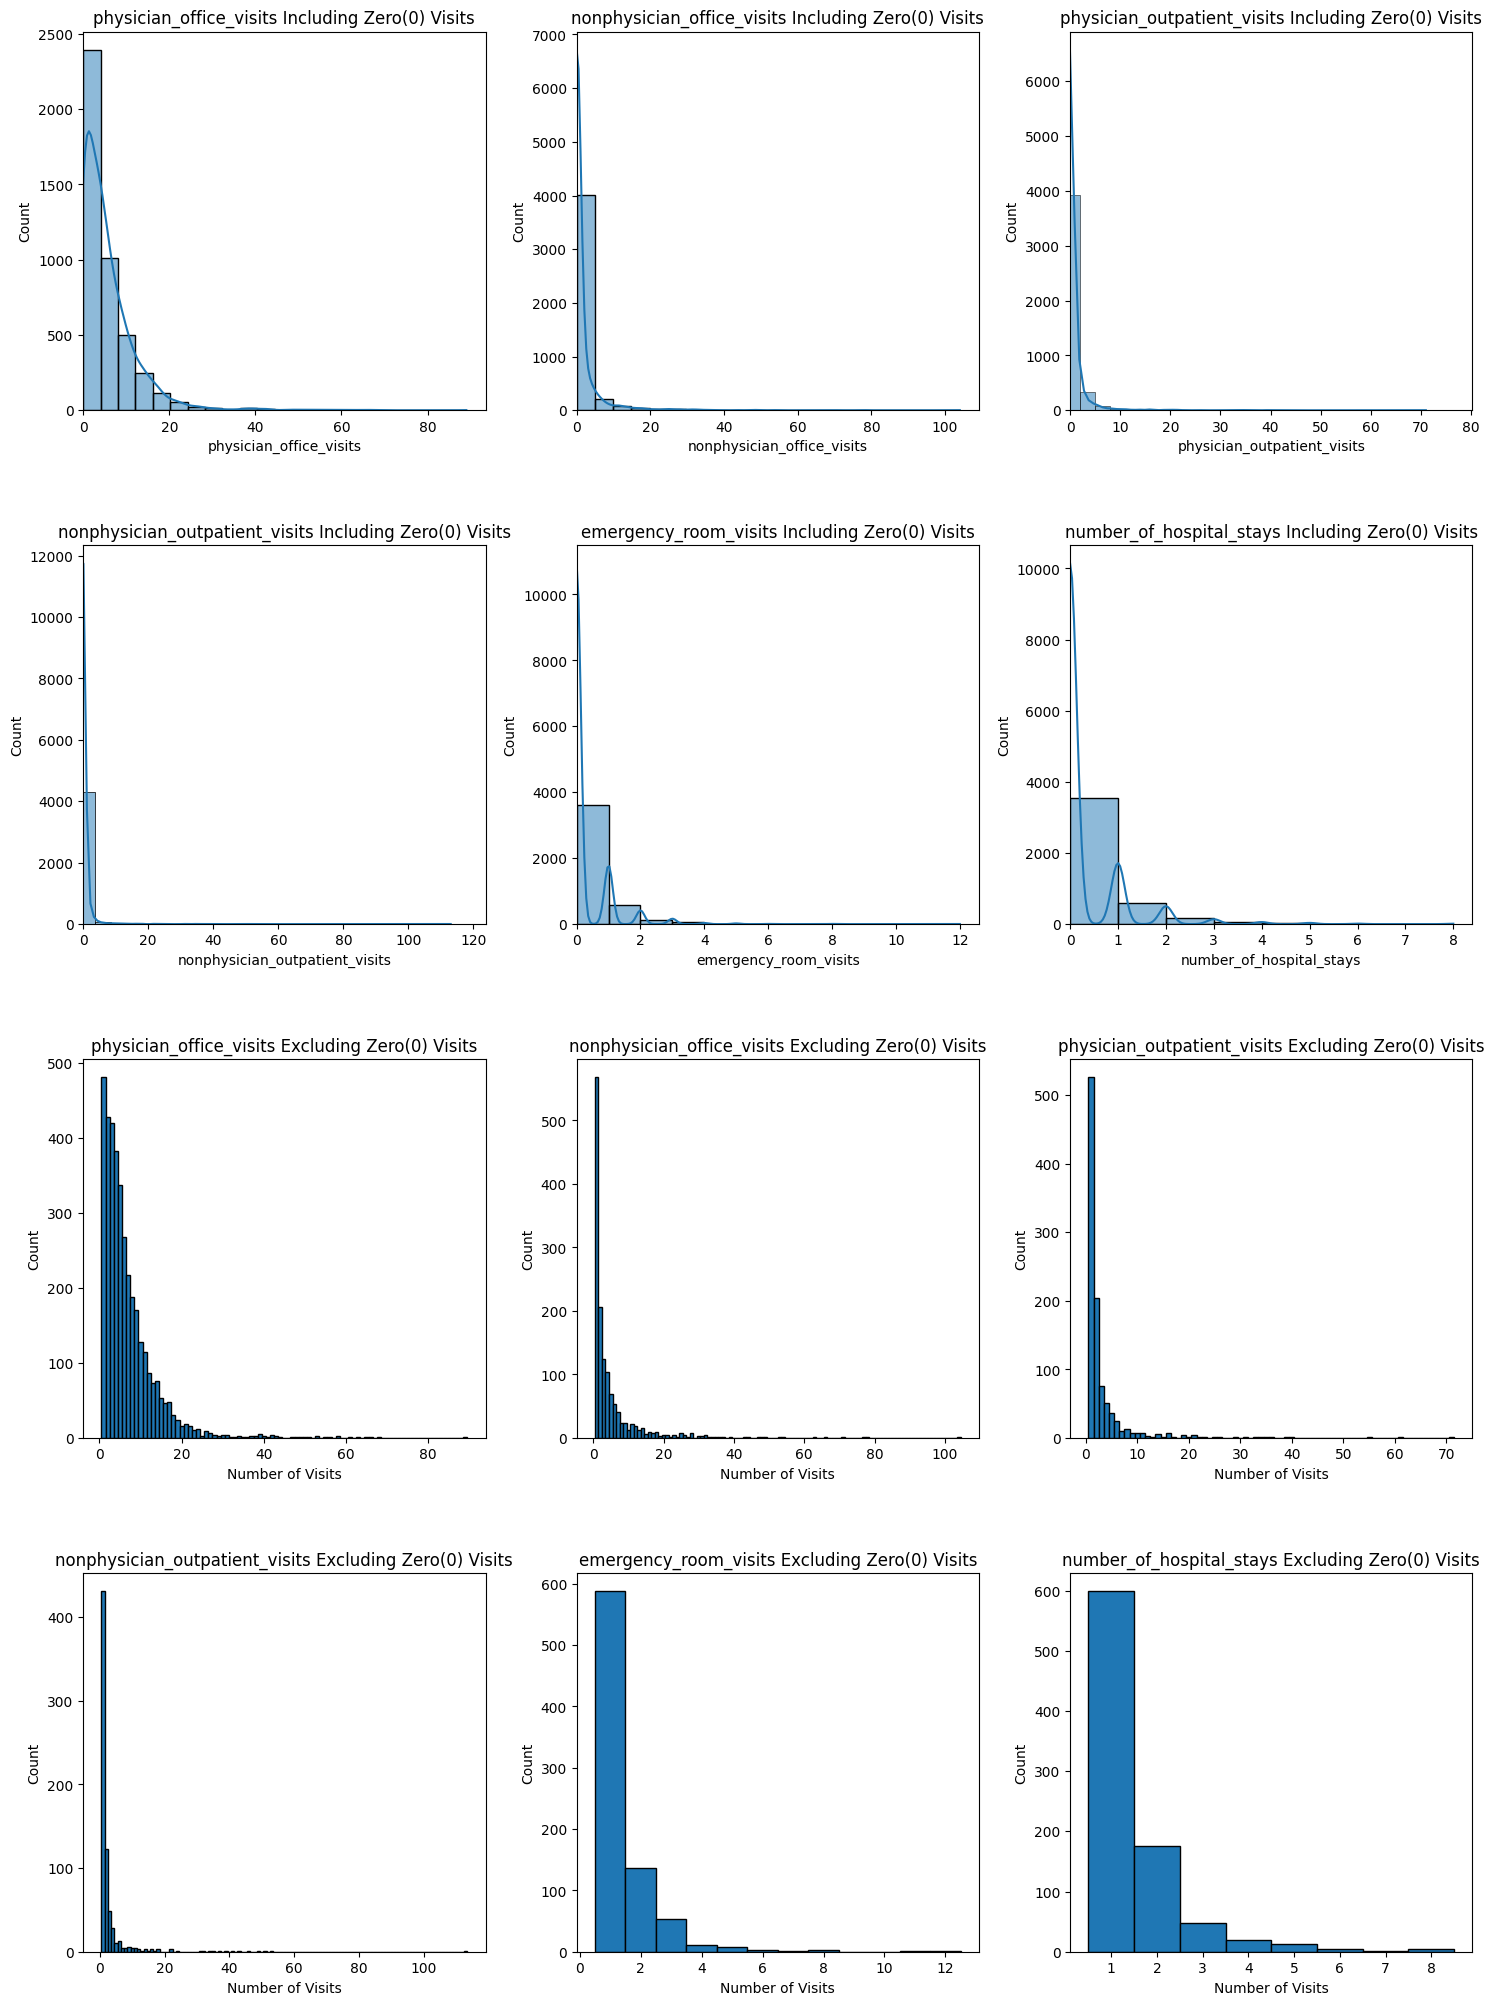

In [ ]:
import matplotlib.scale as mscale

number_of_visit_columns = ['physician_office_visits' ,
                            'nonphysician_office_visits' ,
                            'physician_outpatient_visits' ,
                            'nonphysician_outpatient_visits' ,
                            'emergency_room_visits' ,
                            'number_of_hospital_stays']

n_cols = len(number_of_visit_columns) * 2 + 4
print(f'Number of Columns: {n_cols}')

print('Min - Max of Visits')
for i, col in enumerate(number_of_visit_columns):
    print(f'{col} Min Visits: {df_NSME1988_new[col].min()} Max Visits: {df_NSME1988_new[col].max()}')
print()
print()

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns

    max_val = df_NSME1988_new[col].max()
    binwidth = max(1, max_val // 20)  # Divide range into ~20 bins
    sns.histplot(data=df_NSME1988_new, x=col, ax=axes[i], binwidth=binwidth, kde=True)
    axes[i].set_xlim(left=0)
   
    # tried different scaling techniques and results are still weird
    #axes[i].set_yscale('function', functions=(lambda x: x**0.5, lambda x: x**2))
    #axes[i].set_yscale('log')
    # trying binning (above) next; finally binwidt

    axes[i].set_title(f'{col} Including Zero(0) Visits')

# Excluding zeros
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns
    
    # Filter out zeros
    data_no_zeros = df_NSME1988_new[df_NSME1988_new[col] > 0][col]
    
    max_val = data_no_zeros.max()
    bins = np.arange(0.5, max_val + 1.5, 1)
    
    j = i + 6
    axes[j].hist(data_no_zeros, bins=bins, edgecolor='black')
    axes[j].set_xlabel('Number of Visits')
    axes[j].set_ylabel('Count')

    axes[j].set_title(f'{col} Excluding Zero(0) Visits')    

    
# Hide the blank/empty graphs
for j in range(j + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    
print("Completed")

##### Additional Analysis #####

In [ ]:
print("DDDDDD")


print("WTH??")
# The columns we want to plot:
columns_to_plot = [ 'gender' ,
                    'is_married' ,
                    'years_of_education' ,
                    'family_income' ,
                    'is_employed' ,
                    'has_health_insurance' ,
                    'has_medicaid']

n_cols = len(columns_to_plot) * 2 + 4
print(f'Number of Columns: {n_cols}')

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

sns.countplot(data=df_NSME1988_new, x='gender', ax=axes[0])

# Iterate over each numeric column and plot a historgram
# for i, col in enumerate(columns_to_plot):
    
#     sns.countplot(data=df_NSME1988_new, x=col, ax=axes[i])
#     axes[i].set_title(col)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    

##### Distribution of Patient Visit Types - occurances of each type #####

{'physician_office_visits': np.int64(25442), 'nonphysician_office_visits': np.int64(7129), 'physician_outpatient_visits': np.int64(3052), 'nonphysician_outpatient_visits': np.int64(2106), 'emergency_room_visits': np.int64(1161), 'number_of_hospital_stays': np.int64(1304)}


C:\Users\jxbma\AppData\Local\Temp\ipykernel_9244\3893749027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')


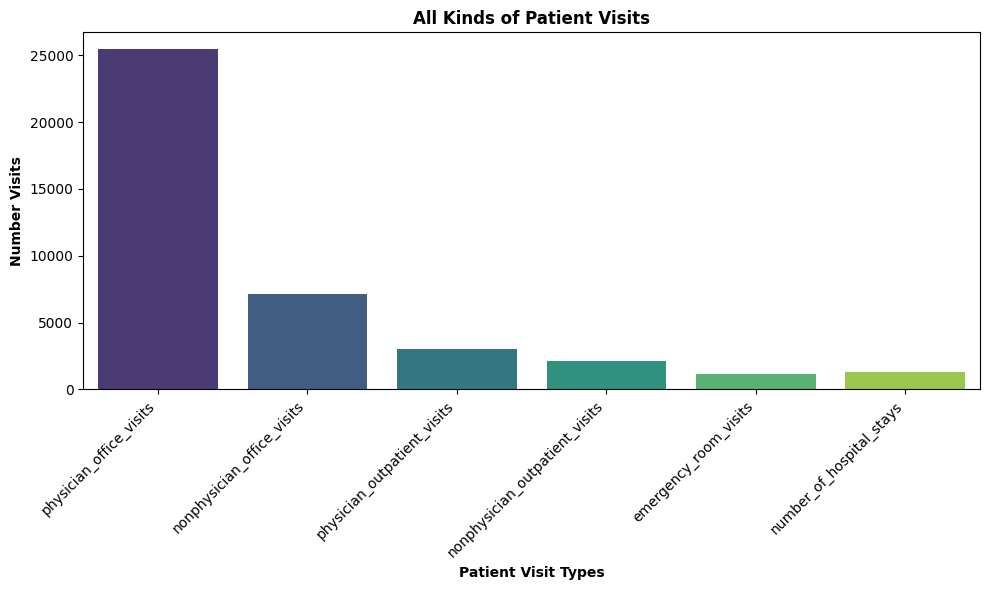

In [ ]:
total_visits = { 'physician_office_visits' : df_NSME1988_new['physician_office_visits'].sum(),
                 'nonphysician_office_visits' : df_NSME1988_new['nonphysician_office_visits'].sum(),
                 'physician_outpatient_visits' : df_NSME1988_new['physician_outpatient_visits'].sum(),
                 'nonphysician_outpatient_visits' : df_NSME1988_new['nonphysician_outpatient_visits'].sum(),
                 'emergency_room_visits': df_NSME1988_new['emergency_room_visits'].sum(),
                 'number_of_hospital_stays' : df_NSME1988_new['number_of_hospital_stays'].sum()}

print(total_visits)

plt.subplots(figsize=(10, 6))


# Title and Label axes
plt.title(f'All Kinds of Patient Visits', fontweight='bold')
plt.xlabel('Patient Visit Types', fontweight='bold')
plt.ylabel('Number Visits', fontweight='bold')
plt.xticks(rotation=45, ha='right')

sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')

plt.tight_layout(h_pad=3)
plt.show()